In [43]:
import numpy as np
import math
import pandas as pd
from matplotlib import pyplot as plt

In [37]:
class Layer:
    def __init__(self,nin,nout):
        self.weights = np.float128(np.random.rand(nout,nin) - 0.5)
        self.bias = np.float128(np.random.rand(nout,1) - 0.5)
        
class MLP:
    def __init__(self,nin,nout):
        percep = [nin] + nout
        self.layers = [Layer(percep[i],percep[i+1]) for i in range(len(nout))]
        self.Zs = []
        self.As = []
        
    def Relu(self, x):
        A = np.maximum(0.0,x)
        return A
    
    def softmax(self,x):
        return np.exp(x)/sum(np.exp(x))
    
    def derive_Relu(self, x):
        return x > 0
    
    def one_hot(self,Y):
        one_hot_Y = np.zeros((Y.size, len(np.unique(Y))))
        one_hot_Y[np.arange(Y.size), Y.astype(int)] = 1
        one_hot_Y = one_hot_Y.T
        return one_hot_Y
    
    def forward(self,layer,x):
        action = layer.weights.dot(x) + layer.bias
        self.Zs.append(action)
        activ = self.Relu(action)
        self.As.append(activ)
        return activ
    
    def forwardpass(self,x):
        ans = self.forward(self.layers[0],x)
        
        for i in range(1,len(self.layers)-1):
            ans = self.forward(self.layers[i], ans)
            
        ans = self.layers[-1].weights.dot(ans) + self.layers[-1].bias
        self.Zs.append(ans)
        
        return self.softmax(ans)
    
    def backwardpass(self,ypred,y,x):
        dweights = []
        dbias = []
        m = y.size
        one_hot_Y = self.one_hot(y)
        dZn = ypred - one_hot_Y
        
        for i in range(len(self.Zs)-1):
            dWn = 1/m * dZn.dot(self.As[len(self.As) - (i+1)].T)
            dBn = 1/m * np.sum(dZn)
            dZn = self.layers[-1-i].weights.T.dot(dZn) * self.derive_Relu(self.Zs[len(self.Zs) - (i+1)])
            dweights.append(dWn)
            dbias.append(dBn)
        
        dW1 = 1 / m * dZn.dot(x.T)
        db1 = 1 / m * np.sum(dZn)
        dweights.append(dW1)
        dbias.append(db1)
        return (dweights, dbias)
        
    def update_params(self, dweights, dbias, alpha):
        pointer = len(self.layers)-1
        for i in range(len(self.layers)):
            W = self.layers[i].weights
            B = self.layers[i].bias
            self.layers[i].weights = W - alpha * dweights[pointer-i]
            self.layers[i].bias = B - alpha * dbias[pointer-i]
            
            self.Zs, self.As = ([],[])
        return
    
    def backprop(self,ypred,y,x,alpha):
        dW , dB =self.backwardpass(ypred,y,x)
        self.update_params(dW,dB,alpha)
        return
    
    def gradient_descent(self,X, Y, alpha, iterations):
        for i in range(iterations):
            preds = self.forwardpass(X)
            self.backprop(preds,Y,X,alpha)
            if i % 10 == 0:
                print("Iteration: ", i)
                predictions = self.get_predictions(preds)
                print(self.get_accuracy(predictions, Y))
        return
    
    def make_preds(self, X):
        Ans = self.forwardpass(X)
        preds = self.get_predictions(Ans)
        return preds

    def test_prediction(self, index, X,Y):
        current_image = X_train[:, index, None]
        prediction = self.make_preds(X_train[:, index, None])
        label = Y_train[index]
        print("Prediction: ", prediction)
        print("Label: ", label)

        current_image = current_image.reshape((28, 28)) * 255
        plt.gray()
        plt.imshow(current_image, interpolation='nearest')
        plt.show()
        return
    
    def get_predictions(self,ans):
        return np.argmax(ans, 0)

    def get_accuracy(self,predictions, Y):
        print(predictions, Y)
        return np.sum(predictions == Y) / Y.size

In [38]:
data = pd.read_csv('train[1].csv')

data

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [39]:
labels = ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']
data = np.array(data)
m, n = data.shape
np.random.shuffle(data) # shuffle before splitting into dev and training sets

data_dev = data[0:int(m*0.25)].T
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev / np.amax(X_dev)

data_train = data[int(m*0.25):m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / np.amax(X_train)
_,m_train = X_train.shape

In [40]:
Y_train.astype(int)

array([6, 7, 1, ..., 5, 0, 9])

In [41]:
test = MLP(784,[10,10])
test.gradient_descent(X_train,Y_train,0.10,601)

Iteration:  0
[5 0 3 ... 3 3 7] [6 7 1 ... 5 0 9]
0.05546031746031746
Iteration:  10
[2 0 1 ... 2 3 1] [6 7 1 ... 5 0 9]
0.1565079365079365
Iteration:  20
[2 9 1 ... 2 9 6] [6 7 1 ... 5 0 9]
0.23555555555555555
Iteration:  30
[2 7 1 ... 2 9 6] [6 7 1 ... 5 0 9]
0.28825396825396826
Iteration:  40
[2 7 1 ... 1 0 6] [6 7 1 ... 5 0 9]
0.3391111111111111
Iteration:  50
[6 7 1 ... 1 0 6] [6 7 1 ... 5 0 9]
0.39136507936507936
Iteration:  60
[6 7 1 ... 1 0 6] [6 7 1 ... 5 0 9]
0.4408888888888889
Iteration:  70
[6 7 1 ... 1 0 8] [6 7 1 ... 5 0 9]
0.48085714285714287
Iteration:  80
[6 7 1 ... 9 0 8] [6 7 1 ... 5 0 9]
0.508
Iteration:  90
[6 7 1 ... 9 0 8] [6 7 1 ... 5 0 9]
0.5371746031746032
Iteration:  100
[6 7 1 ... 9 0 8] [6 7 1 ... 5 0 9]
0.5643809523809524
Iteration:  110
[6 7 1 ... 9 0 8] [6 7 1 ... 5 0 9]
0.5912063492063492
Iteration:  120
[6 7 1 ... 9 0 8] [6 7 1 ... 5 0 9]
0.6147301587301587
Iteration:  130
[6 7 1 ... 7 0 8] [6 7 1 ... 5 0 9]
0.6331111111111111
Iteration:  140
[6 7 1 ..

Prediction:  [2]
Label:  2


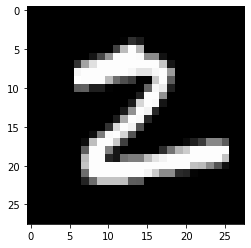

In [49]:
test.test_prediction(170,X_train,Y_train)

In [52]:
preds=test.make_preds(X_dev)
test.get_accuracy(preds, Y_dev)

[0 7 4 ... 9 7 9] [0 7 4 ... 7 7 9]


0.8211428571428572